Steps for resume classification
1. Import Library
2. Data Preprocessing
3. Performing EDA
4. Creating wordcloud using wordcloud library
5. Model building and displaying classification report

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re

In [78]:
resume_data = pd.read_csv('C:/Users/PARESH/Desktop/Lectures/ML Data/UpdatedResumeDataSet.csv')

In [79]:
resume_data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


# 2. Data Preprocessing

In [80]:

def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [81]:
resume_data['cleaned'] = resume_data['Resume'].apply(lambda x:cleanResume(x))
resume_data.head()

,Category,Resume,cleaned
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [82]:
#getting the entire resume into text
corpus=" "
for i in range(0,len(resume_data)):
    corpus= corpus+ resume_data["cleaned"][i]
print(corpus)

 Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [83]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PARESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ModuleNotFoundError: No module named 'wordcloud'

In [84]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
#Tokenizing the text
tokens = tokenizer.tokenize(corpus)
len(tokens)

411913

In [85]:
words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())
words[0:5]

['skills', 'programming', 'languages', 'python', 'pandas']

In [86]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
resume_data['new_Category'] = label.fit_transform(resume_data['Category'])
resume_data.head()

,Category,Resume,cleaned,new_Category
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,6


(array([ 82.,  68.,  97.,  83.,  70., 116., 124.,  95.,  72., 155.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <BarContainer object of 10 artists>)

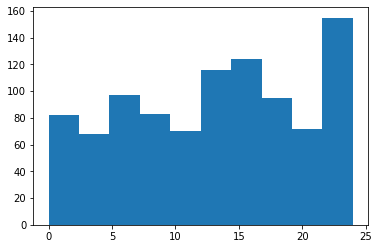

In [87]:
plt.hist(resume_data['new_Category'])

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
text = resume_data['cleaned'].values
target = resume_data['new_Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(text)
WordFeatures = word_vectorizer.transform(text)

In [89]:
WordFeatures.shape

(962, 1500)

# 3. Performing EDA

In [90]:
category = resume_data['Category'].value_counts().reset_index()
category

,index,Category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


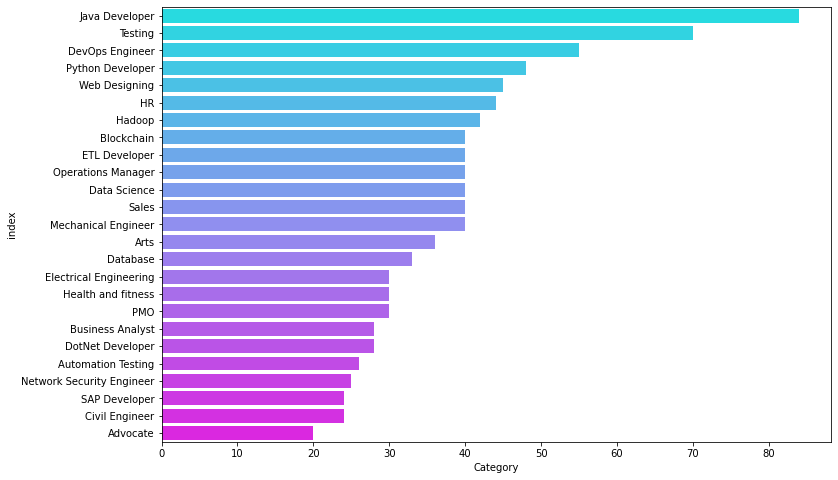

In [91]:
plt.figure(figsize=(12,8))
sns.barplot(x=category['Category'], y=category['index'], palette='cool')
plt.show()

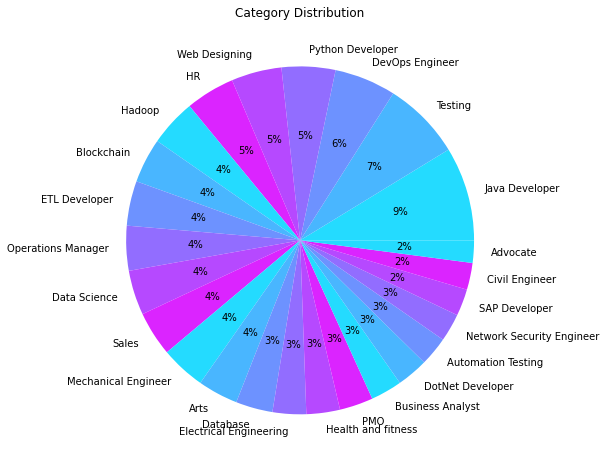

In [92]:
plt.figure(figsize=(12,8))
plt.pie(category['Category'], labels=category['index'],
        colors=sns.color_palette('cool'), autopct='%.0f%%')
plt.title('Category Distribution')
plt.show()

# 4. Wordcloud

In [93]:
stopwords = nltk.corpus.stopwords.words('english')
words_new = []

for word in words:
    if word not in stopwords:
        words_new.append(word)

In [94]:
words_new[0:5]

['skills', 'programming', 'languages', 'python', 'pandas']

In [95]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PARESH\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [96]:
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
wn = WordNetLemmatizer() 
lem_words=[]
for word in words_new:
    word=wn.lemmatize(word)
    lem_words.append(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PARESH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [97]:
lem_words[0:5]

['skill', 'programming', 'language', 'python', 'panda']

In [98]:
same=0
diff=0
for n in range(0,2000):
    if(lem_words[n]==words_new[n]):
        same=same+1
    elif(lem_words[n]!=words_new[n]):
        diff=diff+1
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 328
Number of words not Lemmatized= 1672


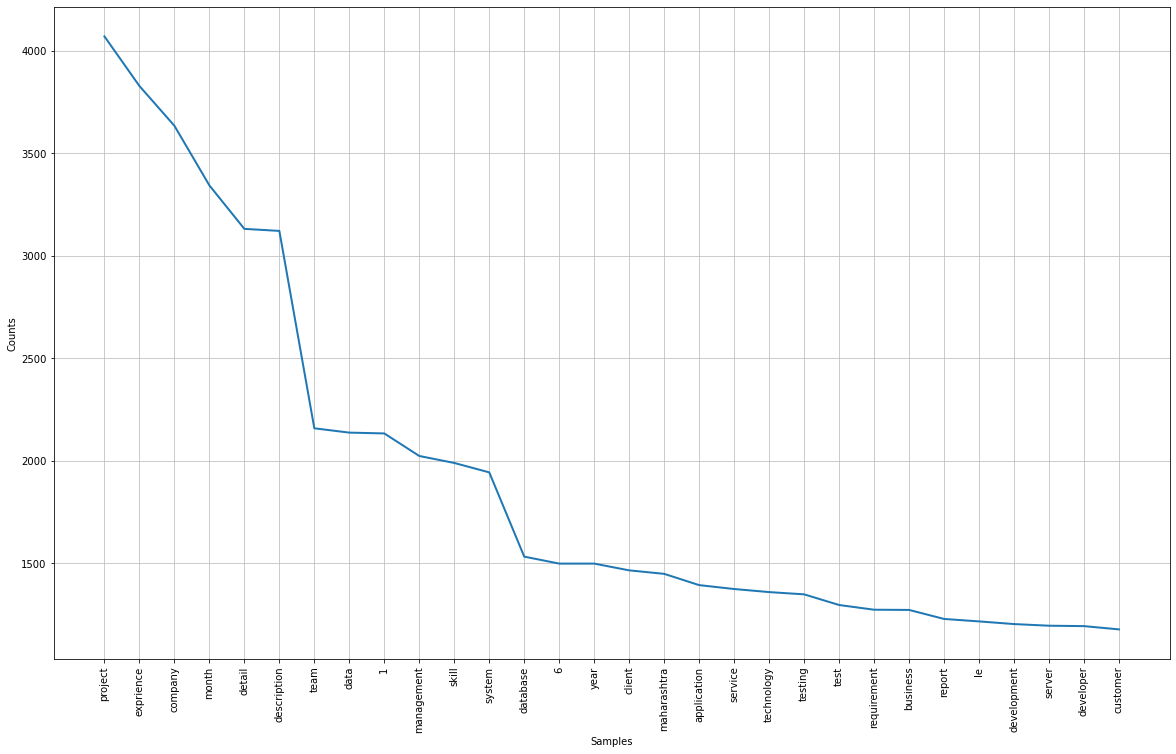

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [99]:
freq_dist = nltk.FreqDist(lem_words)
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist.plot(30)

In [100]:
res=' '.join([i for i in lem_words if not i.isdigit()])

NameError: name 'WordCloud' is not defined

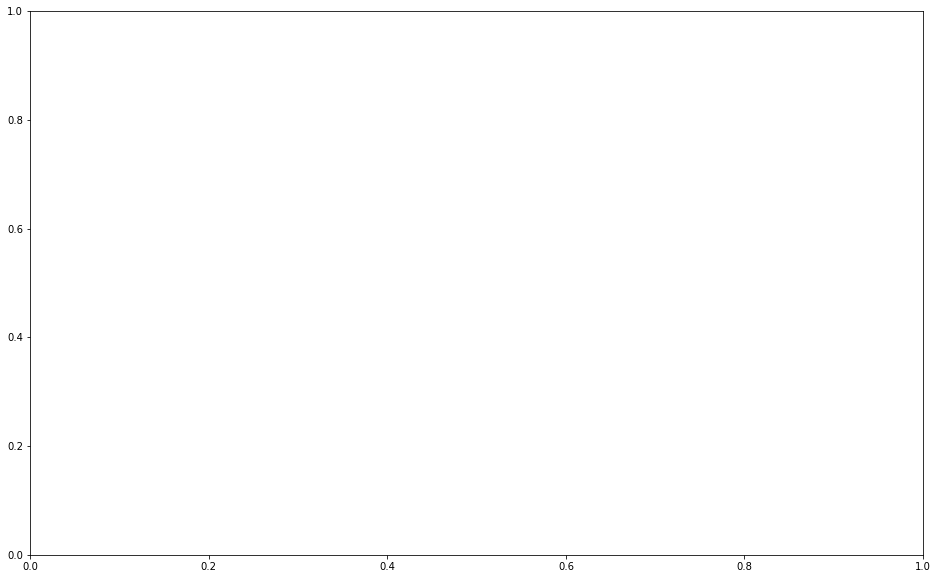

In [76]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=200,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (200 Words)')
plt.axis('off')
plt.show()

# 5. Training and Testing Data

In [26]:
# Seprate train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(WordFeatures, target, random_state=24, test_size=0.2)

In [28]:
# Model Training
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [29]:
# OneVsRest Classifier using KNeighbours
k_neighborus = OneVsRestClassifier(KNeighborsClassifier())
k_neighborus.fit(X_train, Y_train)
# Prediction
Y_pred_k_neighbour = k_neighborus.predict(X_test)

In [30]:
print(f'---------------------------------\n| Training Accuracy   :- {(k_neighborus.score(X_train, Y_train)*100).round(2)}% |')
print(f'---------------------------------\n| Validation Accuracy :- {(k_neighborus.score(X_test, Y_test)*100).round(2)}% |\n---------------------------------')

---------------------------------
| Training Accuracy   :- 98.96% |
---------------------------------
| Validation Accuracy :- 96.89% |
---------------------------------


In [31]:
# OneVsRestClassifer using Random Forest
random_forest = OneVsRestClassifier(RandomForestClassifier())
random_forest.fit(X_train, Y_train)
# Prediction
Y_pred_random_forst = random_forest.predict(X_test)

In [32]:
print(f'---------------------------------\n| Training Accuracy   :- {(random_forest.score(X_train, Y_train)*100).round(2)}% |')
print(f'---------------------------------\n| Validation Accuracy :- {(random_forest.score(X_test, Y_test)*100).round(2)}% |\n---------------------------------')

---------------------------------
| Training Accuracy   :- 100.0% |
---------------------------------
| Validation Accuracy :- 98.96% |
---------------------------------


In [33]:
# OneVsRestClassifer using Random Forest
random_forest = OneVsRestClassifier(RandomForestClassifier())
random_forest.fit(X_train, Y_train)
# Prediction
Y_pred_random_forst = random_forest.predict(X_test)

In [34]:
# Metrics for K Neighbours
print(metrics.classification_report(Y_test, Y_pred_k_neighbour))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      1.00      1.00         9
           2       1.00      0.67      0.80         6
           3       1.00      1.00      1.00         9
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         3
           6       1.00      0.57      0.73         7
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        10
          11       0.80      1.00      0.89         8
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00         7
          17       1.00    

In [35]:
# Metrics for Random Forest
print(metrics.classification_report(Y_test, Y_pred_random_forst))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         9
           2       1.00      0.67      0.80         6
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        10
          11       0.80      1.00      0.89         8
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00         7
          17       1.00    